### Our Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

----
-----
There are many LendingClub data sets on Kaggle. Here is the information on this particular data set:

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>LoanStatNew</th>
      <th>Description</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>0</th>
      <td>loan_amnt</td>
      <td>The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.</td>
    </tr>
    <tr>
      <th>1</th>
      <td>term</td>
      <td>The number of payments on the loan. Values are in months and can be either 36 or 60.</td>
    </tr>
    <tr>
      <th>2</th>
      <td>int_rate</td>
      <td>Interest Rate on the loan</td>
    </tr>
    <tr>
      <th>3</th>
      <td>installment</td>
      <td>The monthly payment owed by the borrower if the loan originates.</td>
    </tr>
    <tr>
      <th>4</th>
      <td>grade</td>
      <td>LC assigned loan grade</td>
    </tr>
    <tr>
      <th>5</th>
      <td>sub_grade</td>
      <td>LC assigned loan subgrade</td>
    </tr>
    <tr>
      <th>6</th>
      <td>emp_title</td>
      <td>The job title supplied by the Borrower when applying for the loan.*</td>
    </tr>
    <tr>
      <th>7</th>
      <td>emp_length</td>
      <td>Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.</td>
    </tr>
    <tr>
      <th>8</th>
      <td>home_ownership</td>
      <td>The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER</td>
    </tr>
    <tr>
      <th>9</th>
      <td>annual_inc</td>
      <td>The self-reported annual income provided by the borrower during registration.</td>
    </tr>
    <tr>
      <th>10</th>
      <td>verification_status</td>
      <td>Indicates if income was verified by LC, not verified, or if the income source was verified</td>
    </tr>
    <tr>
      <th>11</th>
      <td>issue_d</td>
      <td>The month which the loan was funded</td>
    </tr>
    <tr>
      <th>12</th>
      <td>loan_status</td>
      <td>Current status of the loan</td>
    </tr>
    <tr>
      <th>13</th>
      <td>purpose</td>
      <td>A category provided by the borrower for the loan request.</td>
    </tr>
    <tr>
      <th>14</th>
      <td>title</td>
      <td>The loan title provided by the borrower</td>
    </tr>
    <tr>
      <th>15</th>
      <td>zip_code</td>
      <td>The first 3 numbers of the zip code provided by the borrower in the loan application.</td>
    </tr>
    <tr>
      <th>16</th>
      <td>addr_state</td>
      <td>The state provided by the borrower in the loan application</td>
    </tr>
    <tr>
      <th>17</th>
      <td>dti</td>
      <td>A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.</td>
    </tr>
    <tr>
      <th>18</th>
      <td>earliest_cr_line</td>
      <td>The month the borrower's earliest reported credit line was opened</td>
    </tr>
    <tr>
      <th>19</th>
      <td>open_acc</td>
      <td>The number of open credit lines in the borrower's credit file.</td>
    </tr>
    <tr>
      <th>20</th>
      <td>pub_rec</td>
      <td>Number of derogatory public records</td>
    </tr>
    <tr>
      <th>21</th>
      <td>revol_bal</td>
      <td>Total credit revolving balance</td>
    </tr>
    <tr>
      <th>22</th>
      <td>revol_util</td>
      <td>Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.</td>
    </tr>
    <tr>
      <th>23</th>
      <td>total_acc</td>
      <td>The total number of credit lines currently in the borrower's credit file</td>
    </tr>
    <tr>
      <th>24</th>
      <td>initial_list_status</td>
      <td>The initial listing status of the loan. Possible values are – W, F</td>
    </tr>
    <tr>
      <th>25</th>
      <td>application_type</td>
      <td>Indicates whether the loan is an individual application or a joint application with two co-borrowers</td>
    </tr>
    <tr>
      <th>26</th>
      <td>mort_acc</td>
      <td>Number of mortgage accounts.</td>
    </tr>
    <tr>
      <th>27</th>
      <td>pub_rec_bankruptcies</td>
      <td>Number of public record bankruptcies</td>
    </tr>
  </tbody>
</table>

---
----

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('DATA/lending_club_loan_two.csv')

In [3]:
100* df.isnull().sum()/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [5]:
data_info = pd.read_csv('DATA/lending_club_info.csv',index_col='LoanStatNew')

In [6]:
print(data_info.loc['revol_util']['Description'])

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


Defaults are in minority

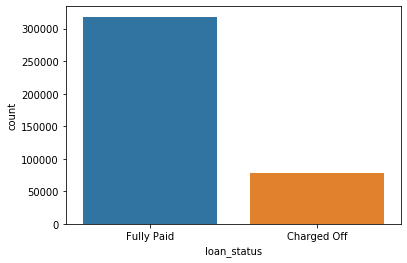

In [7]:
sns.countplot(data=df,x="loan_status")

In [8]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


### Look at headings that might need more work and will remove
- address (too much work)
-emp_title
-credit refinancing - too different (needs cleaning)

### Need to modify
### experiment
-see if grade can be removed, more correlation than s9b_grade?


In [10]:
len(df['emp_title'].unique())

173106

In [11]:
len(df['emp_title'])

396030

In [12]:
len(df['purpose'].unique())

14

In [13]:
len(df['title'].unique())

48818

In [14]:
len(df['application_type'].unique())

3

In [15]:
len(df['sub_grade'].unique())

35

In [16]:
len(df['emp_length'].unique())

12

In [17]:
len(df['purpose'].unique())

14

In [18]:
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000


## Potential Feature engineering
- year, month from timesamps

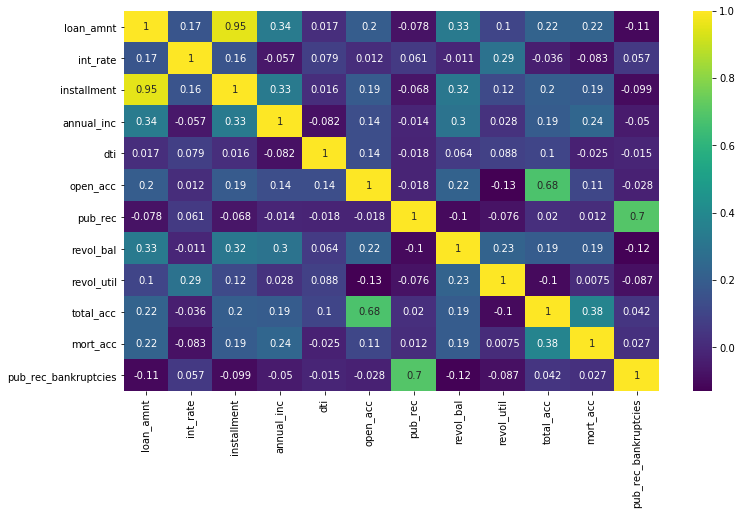

In [19]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

## Categorical Analysis

In [20]:
df.agg({'term': 'unique','grade': 'unique','emp_length': 'unique','home_ownership': 'unique',\
        'verification_status': 'unique','loan_status': 'unique','purpose': 'unique','initial_list_status': 'unique','application_type': 'unique'})

term                                            [ 36 months,  60 months]
grade                                              [B, A, C, E, D, F, G]
emp_length             [10+ years, 4 years, < 1 year, 6 years, 9 year...
home_ownership                   [RENT, MORTGAGE, OWN, OTHER, NONE, ANY]
verification_status            [Not Verified, Source Verified, Verified]
loan_status                                    [Fully Paid, Charged Off]
purpose                [vacation, debt_consolidation, credit_card, ho...
initial_list_status                                               [w, f]
application_type                         [INDIVIDUAL, JOINT, DIRECT_PAY]
dtype: object

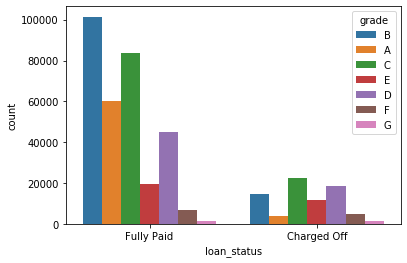

In [21]:
#grades look significant
sns.countplot(data=df,x='loan_status',hue='grade')

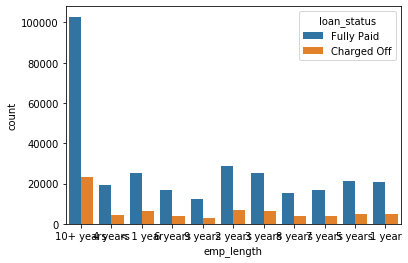

In [22]:
#grades look significant
sns.countplot(data=df,x='emp_length',hue='loan_status')

In [23]:
emp_co = df[df['loan_status']=='Charged Off'].groupby('emp_length').count()['loan_status']
emp_fp =  df[df['loan_status']=='Fully Paid'].groupby('emp_length').count()['loan_status']
emp_len = emp_co/emp_fp

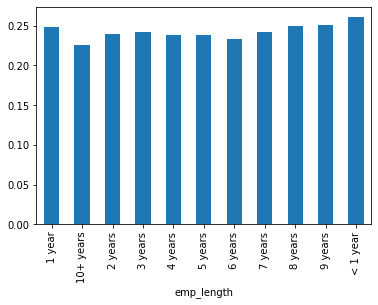

In [24]:
emp_len.plot(kind='bar')

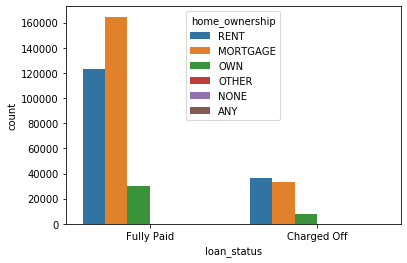

In [25]:
#grades look significant
sns.countplot(data=df,x='loan_status',hue='home_ownership')

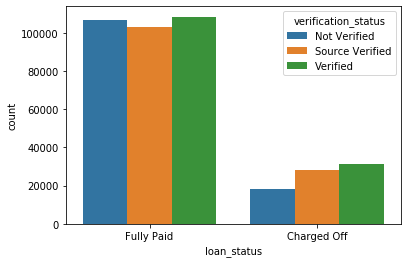

In [26]:
#grades look significant
sns.countplot(data=df,x='loan_status',hue='verification_status')

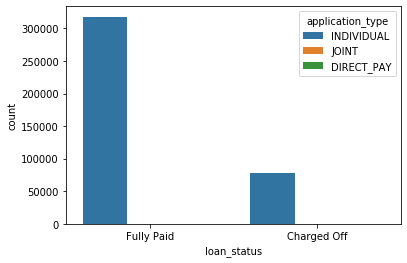

In [27]:
#mainly individual so probably not useful
sns.countplot(data=df,x='loan_status',hue='application_type')

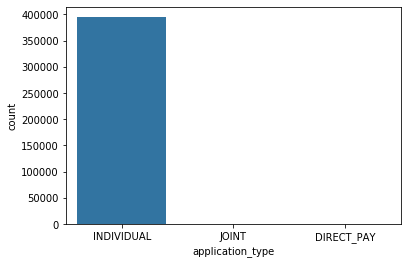

In [28]:
sns.countplot(data=df,x='application_type')

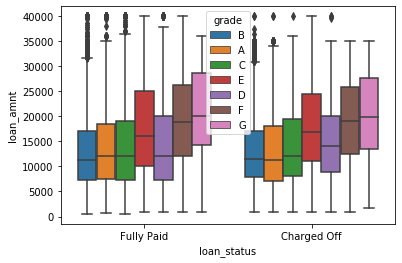

In [29]:
#neither installment or loan amount looks useful, remove
sns.boxplot(data=df,x='loan_status',y='loan_amnt', hue='grade')

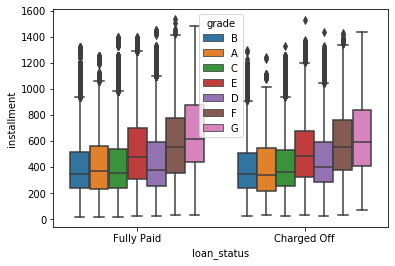

In [30]:
#mainly individual so probably not useful
sns.boxplot(data=df,x='loan_status',y='installment', hue='grade')

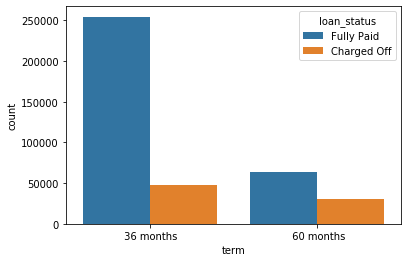

In [31]:
#mainly individual so probably not useful
sns.countplot(data=df,x='term', hue='loan_status')

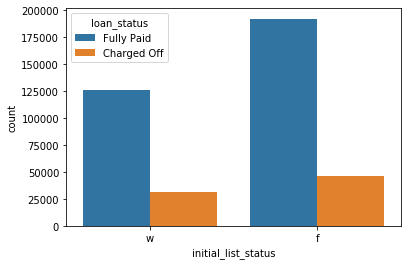

In [32]:
#mainly individual so probably not useful
sns.countplot(data=df,x='initial_list_status', hue='loan_status')

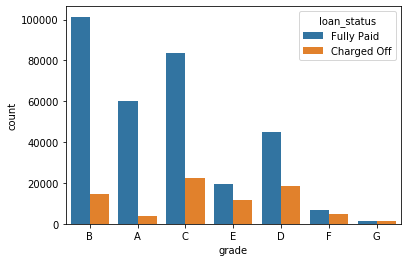

In [33]:
sns.countplot(data=df,x='grade', hue='loan_status')

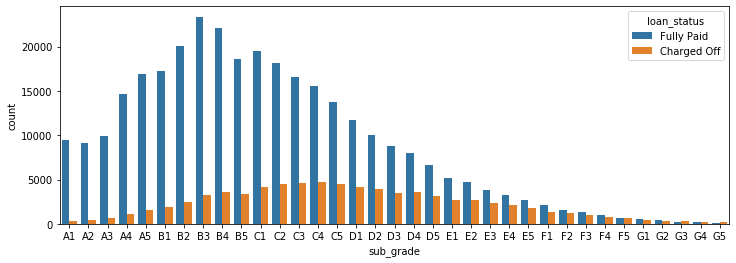

In [34]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df,x='sub_grade', hue='loan_status', order=subgrade_order)

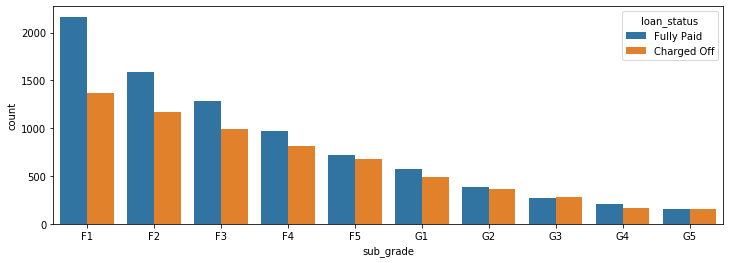

In [35]:
f_and_g = df[(df['grade']=='G') | (df['grade']=='F')]
plt.figure(figsize=(12,4))
subgrade_order = sorted(f_and_g['sub_grade'].unique())
sns.countplot(data=f_and_g,x='sub_grade', hue='loan_status', order=subgrade_order)

In [36]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [37]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

In [38]:
df[['loan_repaid','loan_status']]

,loan_repaid,loan_status
0,1,Fully Paid
1,1,Fully Paid
2,1,Fully Paid
3,1,Fully Paid
4,0,Charged Off
...,...,...
396025,1,Fully Paid
396026,1,Fully Paid
396027,1,Fully Paid
396028,1,Fully Paid


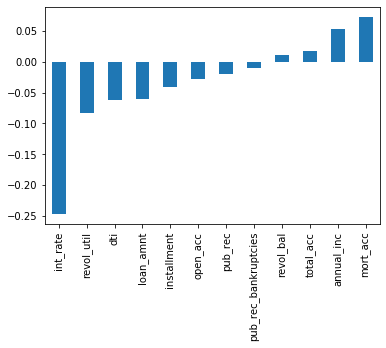

In [39]:
df.corr()['loan_repaid'].sort_values().drop('loan_repaid').plot(kind='bar')

## KEEP
- verification status
- home ownership
- grade
- initial list status
- term status

## LOSE
- loan amount (doesnt seem to impact)
- installment (doesnt seem to impact)
- application type (not enough variation
- emp_length (too many variables)

In [40]:
df.drop(['emp_title','title','grade','emp_length','issue_d','pub_rec_bankruptcies'],axis=1,inplace=True) 

In [41]:
## Feature engineering
#time stamps, take year and months

In [42]:
df.head(20)['address'].transpose()

0          0174 Michelle Gateway\nMendozaberg, OK 22690
1       1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2       87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                 823 Reid Ford\nDelacruzside, MA 00813
4                  679 Luna Roads\nGreggshire, VA 11650
5     1726 Cooper Passage Suite 129\nNorth Deniseber...
6     1008 Erika Vista Suite 748\nEast Stephanie, TX...
7                             USCGC Nunez\nFPO AE 30723
8                              USCGC Tran\nFPO AP 22690
9                  3390 Luis Rue\nMauricestad, VA 00813
10            40245 Cody Drives\nBartlettfort, NM 00813
11     3126 Sean Dale Apt. 141\nSouth Matthew, MS 00813
12       4173 David Extension\nWest Beckyfort, MS 70466
13             3343 Wells Mews\nShellychester, OR 29597
14    0472 Weber Manors Apt. 660\nLake Andrew, NH 29597
15     11629 Sean Hills Suite 614\nStevenfort, HI 30723
16    407 Briggs Lodge Suite 778\nWest Aprilborough,...
17    487 Jennifer Parkway Suite 940\nCummingssh

In [43]:
df['zipcode'] = df['address'].apply(lambda x: x.split()[-1])
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
sub_grade,B4,B5,B3,A2,C5
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified
loan_status,Fully Paid,Fully Paid,Fully Paid,Fully Paid,Charged Off
purpose,vacation,debt_consolidation,credit_card,credit_card,credit_card


In [44]:
#too many
#df['state'] = df['address'].apply(lambda x: x.split()[-2])
#len(df['state'].unique())

In [45]:
#fix application
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [46]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [47]:
df.drop(['address'],axis=1,inplace=True) 

## Preprocessing

In [48]:
total_acc_avg = df.groupby('total_acc').mean()['mort_acc']

In [49]:
total_acc_avg[2.0]

0.0

In [50]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc

In [51]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [52]:
df.isnull().sum()

loan_amnt                0
term                     0
int_rate                 0
installment              0
sub_grade                0
home_ownership           0
annual_inc               0
verification_status      0
loan_status              0
purpose                  0
dti                      0
earliest_cr_line         0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util             276
total_acc                0
initial_list_status      0
application_type         0
mort_acc                 0
loan_repaid              0
zipcode                  0
dtype: int64

In [53]:
df.dropna(inplace=True)

In [54]:
df['earliest_cr_year'] = df['earliest_cr_line'].apply(lambda date:int(date[-4:]))
df = df.drop('earliest_cr_line',axis=1)

In [55]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})
df = df.drop('loan_status',axis=1)

In [56]:
x=df['term'].unique()
x[0]

' 36 months'

In [57]:
df['term']=df['term'].map({x[0]: 36, x[1]: 60})
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,loan_repaid,zipcode,earliest_cr_year
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,1,22690,1990
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,1,05113,2004
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,1,05113,2007
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,1,00813,2006
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0,11650,1999


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            395754 non-null  float64
 1   term                 395754 non-null  int64  
 2   int_rate             395754 non-null  float64
 3   installment          395754 non-null  float64
 4   sub_grade            395754 non-null  object 
 5   home_ownership       395754 non-null  object 
 6   annual_inc           395754 non-null  float64
 7   verification_status  395754 non-null  object 
 8   purpose              395754 non-null  object 
 9   dti                  395754 non-null  float64
 10  open_acc             395754 non-null  float64
 11  pub_rec              395754 non-null  float64
 12  revol_bal            395754 non-null  float64
 13  revol_util           395754 non-null  float64
 14  total_acc            395754 non-null  float64
 15  initial_list_stat

In [59]:
sub_grade = pd.get_dummies(df['sub_grade'],drop_first=True)
sub_grade.shape
sub_grade.head()

,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
df = pd.concat([df,sub_grade],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


In [61]:
home_ownership = pd.get_dummies(df['home_ownership'],drop_first=True)
home_ownership.shape
home_ownership.head()

,OTHER,OWN,RENT
0,0,0,1
1,0,0,0
2,0,0,1
3,0,0,1
4,0,0,0


In [62]:
df = pd.concat([df,home_ownership],axis=1)
df.head().transpose()

,0,1,2,3,4
loan_amnt,10000,8000,15600,7200,24375
term,36,36,36,36,60
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
sub_grade,B4,B5,B3,A2,C5
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000,65000,43057,54000,55000
verification_status,Not Verified,Not Verified,Source Verified,Not Verified,Verified
purpose,vacation,debt_consolidation,credit_card,credit_card,credit_card
dti,26.24,22.05,12.79,2.6,33.95


In [63]:
verification_status = pd.get_dummies(df['verification_status'],drop_first=True)
verification_status.shape
verification_status.head()

,Source Verified,Verified
0,0,0
1,0,0
2,1,0
3,0,0
4,0,1


In [64]:
df = pd.concat([df,verification_status],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,G1,G2,G3,G4,G5,OTHER,OWN,RENT,Source Verified,Verified
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,0,0,0,0,0,1,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,0,0,0,0,1,1,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,1,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,1


In [65]:
purpose = pd.get_dummies(df['purpose'],drop_first=True)
purpose.shape
purpose.head()

,credit_card,debt_consolidation,educational,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0


In [66]:
df = pd.concat([df,purpose],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,home_improvement,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


In [67]:
initial_list_status = pd.get_dummies(df['initial_list_status'],drop_first=True)
initial_list_status.shape
initial_list_status.head()

,w
0,1
1,0
2,0
3,0
4,0


In [68]:
df = pd.concat([df,initial_list_status],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,house,major_purchase,medical,moving,other,renewable_energy,small_business,vacation,wedding,w
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,0,0,0,0,0,1,0,1
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,0,0,0,0,0,0,0


In [69]:
application_type = pd.get_dummies(df['application_type'],drop_first=True)
application_type.shape
application_type.head()

,INDIVIDUAL,JOINT
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [70]:
df = pd.concat([df,application_type],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,medical,moving,other,renewable_energy,small_business,vacation,wedding,w,INDIVIDUAL,JOINT
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,0,0,0,1,0,1,1,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,0,0,0,0,0,0,1,0


In [71]:
zipcode = pd.get_dummies(df['zipcode'],drop_first=True)
zipcode.shape
zipcode.head()

,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0


In [72]:
df = pd.concat([df,zipcode],axis=1)
df.head()

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,purpose,dti,...,JOINT,05113,11650,22690,29597,30723,48052,70466,86630,93700
0,10000.0,36,11.44,329.48,B4,RENT,117000.0,Not Verified,vacation,26.24,...,0,0,0,1,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B5,MORTGAGE,65000.0,Not Verified,debt_consolidation,22.05,...,0,1,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B3,RENT,43057.0,Source Verified,credit_card,12.79,...,0,1,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,A2,RENT,54000.0,Not Verified,credit_card,2.60,...,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C5,MORTGAGE,55000.0,Verified,credit_card,33.95,...,0,0,1,0,0,0,0,0,0,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 85 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   loan_amnt            395754 non-null  float64
 1   term                 395754 non-null  int64  
 2   int_rate             395754 non-null  float64
 3   installment          395754 non-null  float64
 4   sub_grade            395754 non-null  object 
 5   home_ownership       395754 non-null  object 
 6   annual_inc           395754 non-null  float64
 7   verification_status  395754 non-null  object 
 8   purpose              395754 non-null  object 
 9   dti                  395754 non-null  float64
 10  open_acc             395754 non-null  float64
 11  pub_rec              395754 non-null  float64
 12  revol_bal            395754 non-null  float64
 13  revol_util           395754 non-null  float64
 14  total_acc            395754 non-null  float64
 15  initial_list_stat

In [74]:
df.drop(['sub_grade','home_ownership','verification_status','purpose','initial_list_status','application_type','zipcode'],axis=1,inplace=True)

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loan_amnt           395754 non-null  float64
 1   term                395754 non-null  int64  
 2   int_rate            395754 non-null  float64
 3   installment         395754 non-null  float64
 4   annual_inc          395754 non-null  float64
 5   dti                 395754 non-null  float64
 6   open_acc            395754 non-null  float64
 7   pub_rec             395754 non-null  float64
 8   revol_bal           395754 non-null  float64
 9   revol_util          395754 non-null  float64
 10  total_acc           395754 non-null  float64
 11  mort_acc            395754 non-null  float64
 12  loan_repaid         395754 non-null  int64  
 13  earliest_cr_year    395754 non-null  int64  
 14  A2                  395754 non-null  uint8  
 15  A3                  395754 non-nul

## TRAIN TEST SPLIT

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395754 entries, 0 to 396029
Data columns (total 78 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loan_amnt           395754 non-null  float64
 1   term                395754 non-null  int64  
 2   int_rate            395754 non-null  float64
 3   installment         395754 non-null  float64
 4   annual_inc          395754 non-null  float64
 5   dti                 395754 non-null  float64
 6   open_acc            395754 non-null  float64
 7   pub_rec             395754 non-null  float64
 8   revol_bal           395754 non-null  float64
 9   revol_util          395754 non-null  float64
 10  total_acc           395754 non-null  float64
 11  mort_acc            395754 non-null  float64
 12  loan_repaid         395754 non-null  int64  
 13  earliest_cr_year    395754 non-null  int64  
 14  A2                  395754 non-null  uint8  
 15  A3                  395754 non-nul

In [78]:
X = df.drop('loan_repaid',axis=1).values
X

array([[1.000e+04, 3.600e+01, 1.144e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [8.000e+03, 3.600e+01, 1.199e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.560e+04, 3.600e+01, 1.049e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [5.000e+03, 3.600e+01, 9.990e+00, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [2.100e+04, 6.000e+01, 1.531e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [2.000e+03, 3.600e+01, 1.361e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00]])

In [79]:
y=df['loan_repaid'].values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Normalizing Data

In [81]:
from sklearn.preprocessing import MinMaxScaler

In [82]:
scaler = MinMaxScaler()

In [83]:
X_train = scaler.fit_transform(X_train)

In [84]:
X_test = scaler.fit_transform(X_test)

In [85]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.constraints import max_norm

In [86]:
model = Sequential()

model.add(Dense(78, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(18, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(9, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [87]:
model.fit(x=X_train, y=y_train, epochs=25,batch_size=256, validation_data=(X_test,y_test),)

Train on 265155 samples, validate on 130599 samples
Epoch 1/25
265155/265155 [==============================] - 7s 28us/sample - loss: 0.3184 - val_loss: 0.2652
Epoch 2/25
265155/265155 [==============================] - 5s 19us/sample - loss: 0.2689 - val_loss: 0.2633
Epoch 3/25
265155/265155 [==============================] - 5s 18us/sample - loss: 0.2645 - val_loss: 0.2638
Epoch 4/25
265155/265155 [==============================] - 4s 16us/sample - loss: 0.2629 - val_loss: 0.2629
Epoch 5/25
265155/265155 [==============================] - 6s 21us/sample - loss: 0.2616 - val_loss: 0.2631
Epoch 6/25
265155/265155 [==============================] - 5s 19us/sample - loss: 0.2612 - val_loss: 0.2622
Epoch 7/25
265155/265155 [==============================] - 5s 20us/sample - loss: 0.2608 - val_loss: 0.2636
Epoch 8/25
265155/265155 [==============================] - 6s 21us/sample - loss: 0.2602 - val_loss: 0.2639
Epoch 9/25
265155/265155 [==============================] - 5s 19us/sample -

## Evaluating

In [88]:
loss = pd.DataFrame(model.history.history)
loss

,loss,val_loss
0,0.318350,0.265211
1,0.268943,0.263288
2,0.264537,0.263757
3,0.262934,0.262920
4,0.261560,0.263138
5,0.261241,0.262203
6,0.260757,0.263632
7,0.260154,0.263856
8,0.259950,0.263503
9,0.259300,0.262657


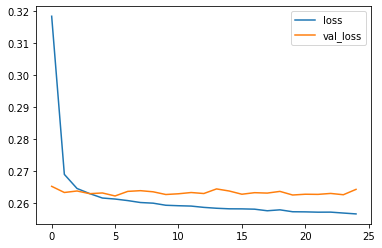

In [89]:
loss[['loss','val_loss']].plot()

In [90]:
from sklearn.metrics import classification_report,confusion_matrix

In [91]:
predictions = model.predict_classes(X_test)

In [92]:
print(classification_report(y_test,predictions))
print('\n')
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.44      0.61     25569
           1       0.88      1.00      0.93    105030

    accuracy                           0.89    130599
   macro avg       0.93      0.72      0.77    130599
weighted avg       0.90      0.89      0.87    130599



[[ 11201  14368]
 [   249 104781]]


In [93]:
import random
random.seed(101)
random_ind = random.randint(0,len(df))
random_ind

304691

In [94]:
new_customer = df.drop('loan_repaid',axis=1).iloc[random_ind]
new_customer

loan_amnt        6000.00
term               36.00
int_rate           10.49
installment       194.99
annual_inc     103916.00
                 ...    
30723               0.00
48052               0.00
70466               0.00
86630               0.00
93700               0.00
Name: 304917, Length: 77, dtype: float64

In [95]:
model.predict_classes(scaler.transform(new_customer.values.reshape(1,77)))

array([[1]])

In [96]:
df.iloc[random_ind]['loan_repaid']

1.0